In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from prepare_country_data import transpose_for_country_code, split_and_normalize, cyclical_transformation

/var/folders/bc/ynvgg9rn14v5sl_jcp8x8_s40000gn/T/ipykernel_9348/1652213413.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
df = pd.read_csv("data/2023/nordic_energy_data.csv")
df_dk1 = transpose_for_country_code(df, "DK_1")

In [7]:
df_dk1['Timestamp'] = pd.to_datetime(df_dk1['Timestamp'])
df_dk1['Hour'] = df_dk1['Timestamp'].dt.hour
df_dk1['Day'] = df_dk1['Timestamp'].dt.day

# make cyclical transformation of Hour and Day
df_dk1['Hour_sin'] = np.sin(df_dk1['Hour']*(2.*np.pi/24))
df_dk1['Hour_cos'] = np.cos(df_dk1['Hour']*(2.*np.pi/24))
df_dk1['Day_sin'] = np.sin(df_dk1['Day']*(2.*np.pi/7))
df_dk1['Day_cos'] = np.cos(df_dk1['Day']*(2.*np.pi/7))
df_dk1 = df_dk1.drop(columns=['Hour', 'Day'])

df_dk1.head()

,Timestamp,DA-price [EUR/MWh],Forecasted Load,Forecasted Generation,Solar,Wind Offshore,Wind Onshore,Cap_to_DK_2,Cap_to_NL,Cap_to_NO_2,...,Cap_to_SE_3_FI,Cap_to_SE_3_NO_1,Cap_to_SE_3_SE_2,Cap_to_SE_3_SE_4,Cap_to_SE_4_DK_2,Cap_to_SE_4_SE_3,Hour_sin,Hour_cos,Day_sin,Day_cos
0,2023-01-01 00:00:00,2.01,2135.0,832.0,0.0,75.0,556.0,590.0,700.0,1632.0,...,0.0,2145.0,6800.0,2800.0,1700.0,4800.0,0.000000,1.000000,0.781831,0.62349
1,2023-01-01 01:00:00,1.38,2084.0,974.0,0.0,146.0,639.0,590.0,700.0,1632.0,...,0.0,2145.0,6800.0,2800.0,1700.0,4800.0,0.258819,0.965926,0.781831,0.62349
2,2023-01-01 02:00:00,0.09,2059.0,1165.0,0.0,328.0,735.0,590.0,700.0,1632.0,...,0.0,2145.0,6800.0,2800.0,1700.0,4800.0,0.500000,0.866025,0.781831,0.62349
3,2023-01-01 03:00:00,0.08,2001.0,1437.0,0.0,376.0,870.0,590.0,700.0,1632.0,...,0.0,2145.0,6800.0,2800.0,1700.0,4800.0,0.707107,0.707107,0.781831,0.62349
4,2023-01-01 04:00:00,0.05,1969.0,1517.0,0.0,429.0,1047.0,590.0,700.0,1632.0,...,0.0,2145.0,6800.0,2800.0,1700.0,4800.0,0.866025,0.500000,0.781831,0.62349


Mean squared error: 1084.8833281724148
Root mean squared error: 32.93756712588856


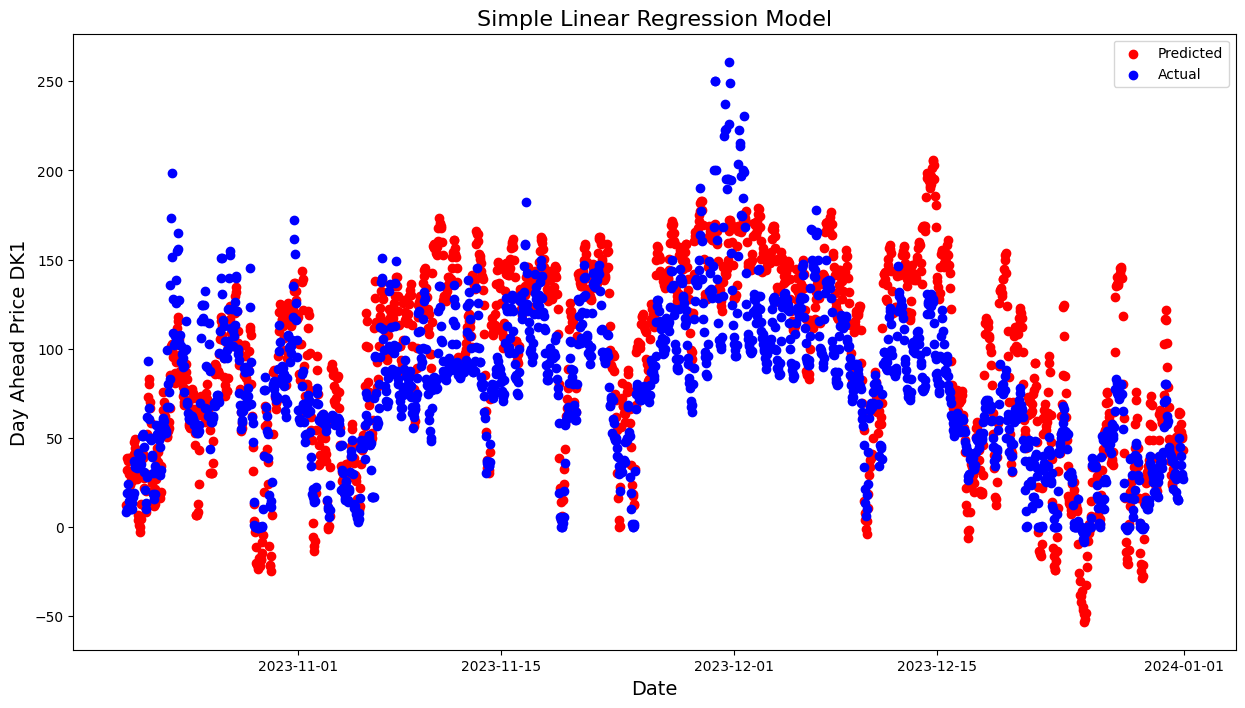

In [8]:
X_train, X_test, y_train, y_test = split_and_normalize(df_dk1)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")

# figsize=(20, 10)
plt.figure(figsize=(15, 8))

plt.scatter(y_test.index, y_pred, label="Predicted", color="red")
plt.scatter(y_test.index, y_test, label="Actual", color="blue")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Day Ahead Price DK1", fontsize=14)
plt.title("Simple Linear Regression Model", fontsize=16)
plt.legend()
plt.show()